<a href="https://colab.research.google.com/github/Aditya33534523/Music_genere_classification/blob/main/music_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MUSIC GENRE CLASSIFICATION - LIGHTWEIGHT VERSION
Dataset not found. Generating new dataset...
Generating realistic synthetic dataset...

Dataset Generated Successfully!
Total samples: 1200
Features: 69
Genres: 8

Genre Distribution:
genre
Blues         150
Classical     150
Country       150
Electronic    150
Hip-Hop       150
Jazz          150
Pop           150
Rock          150
Name: count, dtype: int64

✓ Dataset saved as 'music_genre_dataset.csv'

Feature vector size: 69 features

TRAINING MAIN MODEL

Training RANDOM FOREST Model
Training samples: 960
Test samples: 240

Training...

RESULTS
Training Accuracy: 1.0000
Test Accuracy: 0.9708
Test F1 Score: 0.9704

Detailed Classification Report:
              precision    recall  f1-score   support

       Blues     0.8108    1.0000    0.8955        30
   Classical     1.0000    1.0000    1.0000        30
     Country     1.0000    1.0000    1.0000        30
  Electronic     1.0000    1.0000    1.0000        30
     Hip-Hop     1.0000 

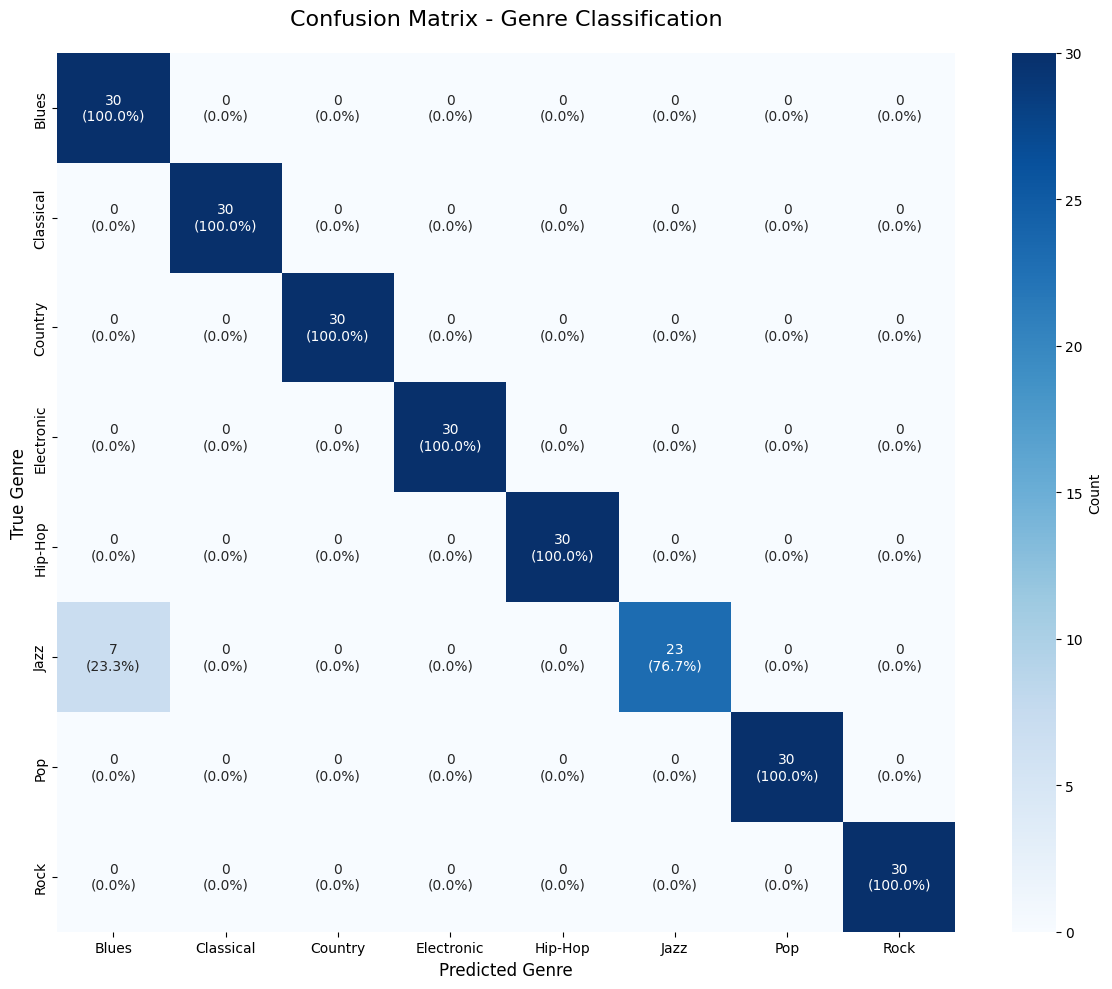

✓ Feature importance plot saved: feature_importance.png


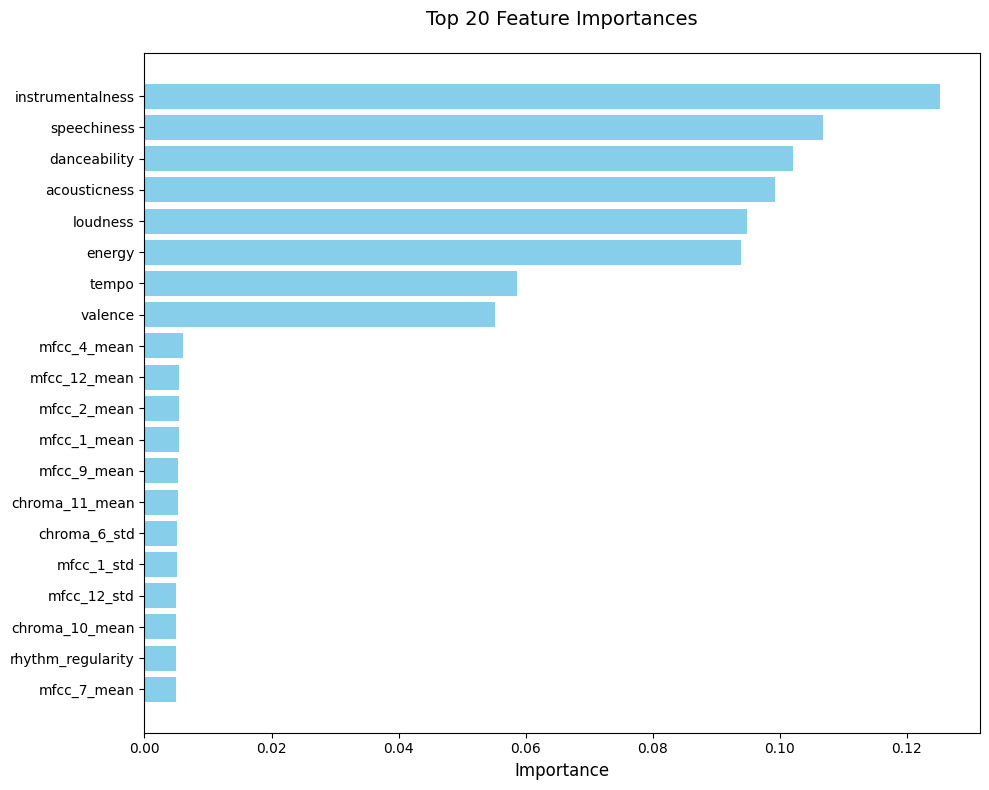

✓ Model saved: music_genre_model.pkl

Compare all models? (y/n): y

COMPARING MULTIPLE MODELS

--- Testing RANDOM FOREST ---

Training RANDOM FOREST Model
Training samples: 960
Test samples: 240

Training...

RESULTS
Training Accuracy: 1.0000
Test Accuracy: 0.9708
Test F1 Score: 0.9704

Detailed Classification Report:
              precision    recall  f1-score   support

       Blues     0.8108    1.0000    0.8955        30
   Classical     1.0000    1.0000    1.0000        30
     Country     1.0000    1.0000    1.0000        30
  Electronic     1.0000    1.0000    1.0000        30
     Hip-Hop     1.0000    1.0000    1.0000        30
        Jazz     1.0000    0.7667    0.8679        30
         Pop     1.0000    1.0000    1.0000        30
        Rock     1.0000    1.0000    1.0000        30

    accuracy                         0.9708       240
   macro avg     0.9764    0.9708    0.9704       240
weighted avg     0.9764    0.9708    0.9704       240


Cross-Validation (5-fold):
C

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.decomposition import PCA
import joblib
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

class LightweightMusicClassifier:
    def __init__(self):
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.model = None
        self.feature_names = None

    def generate_realistic_dataset(self, n_samples_per_genre=150):
        print("Generating realistic synthetic dataset...")

        genres = ['Rock', 'Pop', 'Classical', 'Jazz', 'Hip-Hop', 'Electronic', 'Blues', 'Country']

        genre_params = {
            'Rock': {
                'tempo': (110, 140, 15),  # mean, center, std
                'energy': (0.7, 0.9),
                'danceability': (0.4, 0.7),
                'valence': (0.4, 0.7),
                'acousticness': (0.1, 0.4),
                'instrumentalness': (0.3, 0.7),
                'loudness': (-8, -4),
                'speechiness': (0.03, 0.08),
            },
            'Pop': {
                'tempo': (100, 130, 12),
                'energy': (0.6, 0.85),
                'danceability': (0.6, 0.9),
                'valence': (0.5, 0.8),
                'acousticness': (0.1, 0.5),
                'instrumentalness': (0.0, 0.2),
                'loudness': (-7, -4),
                'speechiness': (0.03, 0.12),
            },
            'Classical': {
                'tempo': (70, 120, 25),
                'energy': (0.2, 0.6),
                'danceability': (0.2, 0.5),
                'valence': (0.3, 0.6),
                'acousticness': (0.6, 0.95),
                'instrumentalness': (0.7, 0.99),
                'loudness': (-15, -8),
                'speechiness': (0.0, 0.04),
            },
            'Jazz': {
                'tempo': (80, 140, 25),
                'energy': (0.3, 0.7),
                'danceability': (0.4, 0.7),
                'valence': (0.4, 0.7),
                'acousticness': (0.3, 0.8),
                'instrumentalness': (0.5, 0.9),
                'loudness': (-12, -6),
                'speechiness': (0.03, 0.08),
            },
            'Hip-Hop': {
                'tempo': (85, 105, 10),
                'energy': (0.6, 0.9),
                'danceability': (0.7, 0.95),
                'valence': (0.4, 0.8),
                'acousticness': (0.05, 0.3),
                'instrumentalness': (0.0, 0.3),
                'loudness': (-6, -3),
                'speechiness': (0.15, 0.40),
            },
            'Electronic': {
                'tempo': (120, 140, 10),
                'energy': (0.7, 0.95),
                'danceability': (0.7, 0.95),
                'valence': (0.5, 0.8),
                'acousticness': (0.0, 0.2),
                'instrumentalness': (0.4, 0.9),
                'loudness': (-5, -2),
                'speechiness': (0.03, 0.10),
            },
            'Blues': {
                'tempo': (70, 100, 15),
                'energy': (0.3, 0.6),
                'danceability': (0.4, 0.7),
                'valence': (0.2, 0.5),
                'acousticness': (0.4, 0.8),
                'instrumentalness': (0.4, 0.8),
                'loudness': (-10, -6),
                'speechiness': (0.03, 0.08),
            },
            'Country': {
                'tempo': (90, 130, 18),
                'energy': (0.5, 0.75),
                'danceability': (0.5, 0.8),
                'valence': (0.5, 0.8),
                'acousticness': (0.4, 0.8),
                'instrumentalness': (0.1, 0.5),
                'loudness': (-8, -5),
                'speechiness': (0.03, 0.10),
            },
        }

        data = []

        for genre in genres:
            params = genre_params[genre]

            for i in range(n_samples_per_genre):
                # Generate correlated features
                tempo_mean, tempo_center, tempo_std = params['tempo']
                tempo = np.random.normal(tempo_center, tempo_std)
                tempo = np.clip(tempo, 40, 200)

                sample = {
                    'genre': genre,
                    'tempo': tempo,
                    'energy': np.random.uniform(*params['energy']),
                    'danceability': np.random.uniform(*params['danceability']),
                    'valence': np.random.uniform(*params['valence']),
                    'acousticness': np.random.uniform(*params['acousticness']),
                    'instrumentalness': np.random.uniform(*params['instrumentalness']),
                    'loudness': np.random.uniform(*params['loudness']),
                    'speechiness': np.random.uniform(*params['speechiness']),
                    'liveness': np.random.uniform(0.05, 0.35),
                    'duration_ms': np.random.uniform(180000, 300000),
                }
                for j in range(13):
                    if genre in ['Classical', 'Jazz']:
                        mfcc_base = np.random.normal(0, 40)
                    elif genre in ['Hip-Hop', 'Electronic']:
                        mfcc_base = np.random.normal(0, 60)
                    else:
                        mfcc_base = np.random.normal(0, 50)

                    sample[f'mfcc_{j}_mean'] = mfcc_base
                    sample[f'mfcc_{j}_std'] = np.random.uniform(15, 80)
                for j in range(12):
                    sample[f'chroma_{j}_mean'] = np.random.uniform(0.1, 0.9)
                    sample[f'chroma_{j}_std'] = np.random.uniform(0.05, 0.4)

                sample['spectral_centroid_std'] = np.random.uniform(200, 1000)
                sample['spectral_bandwidth_mean'] = np.random.uniform(1500, 3500)
                sample['spectral_bandwidth_std'] = np.random.uniform(300, 1000)
                sample['spectral_rolloff_mean'] = np.random.uniform(2000, 6000)
                sample['spectral_rolloff_std'] = np.random.uniform(400, 1500)

                sample['zcr_mean'] = np.random.uniform(0.03, 0.15)
                sample['zcr_std'] = np.random.uniform(0.01, 0.05)

                sample['beat_strength'] = np.random.uniform(0.3, 0.9)
                sample['rhythm_regularity'] = np.random.uniform(0.4, 0.95)

                data.append(sample)

        df = pd.DataFrame(data)

        print(f"\n{'='*60}")
        print(f"Dataset Generated Successfully!")
        print(f"{'='*60}")
        print(f"Total samples: {len(df)}")
        print(f"Features: {len(df.columns) - 1}")
        print(f"Genres: {len(genres)}")
        print(f"\nGenre Distribution:")
        print(df['genre'].value_counts().sort_index())

        df.to_csv('music_genre_dataset.csv', index=False)
        print(f"\n✓ Dataset saved as 'music_genre_dataset.csv'")

        return df

    def load_dataset(self, filepath='music_genre_dataset.csv'):
        try:
            df = pd.read_csv(filepath)
            print(f"✓ Dataset loaded: {filepath}")
            print(f"  Shape: {df.shape}")
            return df
        except FileNotFoundError:
            print(f"Dataset not found. Generating new dataset...")
            return self.generate_realistic_dataset()

    def prepare_data(self, df):
        X = df.drop('genre', axis=1).values
        y = df['genre'].values
        self.feature_names = df.drop('genre', axis=1).columns.tolist()

        return X, y

    def train(self, X, y, model_type='random_forest', optimize=False):
        print(f"\n{'='*60}")
        print(f"Training {model_type.upper().replace('_', ' ')} Model")
        print(f"{'='*60}")
        y_encoded = self.label_encoder.fit_transform(y)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )

        print(f"Training samples: {len(X_train)}")
        print(f"Test samples: {len(X_test)}")
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        models = {
            'random_forest': RandomForestClassifier(
                n_estimators=100, max_depth=20, min_samples_split=5,
                random_state=42, n_jobs=-1
            ),
            'gradient_boosting': GradientBoostingClassifier(
                n_estimators=100, learning_rate=0.1, max_depth=5,
                random_state=42
            ),
            'svm': SVC(
                kernel='rbf', C=10, gamma='scale', random_state=42
            ),
            'knn': KNeighborsClassifier(
                n_neighbors=7, weights='distance', n_jobs=-1
            ),
            'naive_bayes': GaussianNB(),
            'logistic_regression': LogisticRegression(
                max_iter=1000, random_state=42, n_jobs=-1
            )
        }

        self.model = models.get(model_type, models['random_forest'])
        if optimize and model_type == 'random_forest':
            print("\nOptimizing hyperparameters...")
            param_grid = {
                'n_estimators': [50, 100, 150],
                'max_depth': [10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
            grid_search = GridSearchCV(
                self.model, param_grid, cv=3, n_jobs=-1, verbose=1
            )
            grid_search.fit(X_train_scaled, y_train)
            self.model = grid_search.best_estimator_
            print(f"Best parameters: {grid_search.best_params_}")
        else:
            print("\nTraining...")
            self.model.fit(X_train_scaled, y_train)


        y_pred_train = self.model.predict(X_train_scaled)
        y_pred_test = self.model.predict(X_test_scaled)


        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)
        test_f1 = f1_score(y_test, y_pred_test, average='weighted')

        print(f"\n{'='*60}")
        print("RESULTS")
        print(f"{'='*60}")
        print(f"Training Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
        print(f"Test F1 Score: {test_f1:.4f}")

        print("\nDetailed Classification Report:")
        print(classification_report(
            y_test, y_pred_test,
            target_names=self.label_encoder.classes_,
            digits=4
        ))


        print("\nCross-Validation (5-fold):")
        cv_scores = cross_val_score(
            self.model, X_train_scaled, y_train, cv=5, n_jobs=-1
        )
        print(f"CV Scores: {[f'{score:.4f}' for score in cv_scores]}")
        print(f"Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

        return X_test_scaled, y_test, y_pred_test

    def plot_confusion_matrix(self, y_true, y_pred, save_path='confusion_matrix.png'):
        """
        Plot confusion matrix
        """
        cm = confusion_matrix(y_true, y_pred)
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

        plt.figure(figsize=(12, 10))

        annotations = np.empty_like(cm, dtype=object)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                annotations[i, j] = f'{cm[i, j]}\n({cm_percent[i, j]:.1f}%)'

        sns.heatmap(
            cm, annot=annotations, fmt='', cmap='Blues',
            xticklabels=self.label_encoder.classes_,
            yticklabels=self.label_encoder.classes_,
            cbar_kws={'label': 'Count'}
        )
        plt.title('Confusion Matrix - Genre Classification', fontsize=16, pad=20)
        plt.ylabel('True Genre', fontsize=12)
        plt.xlabel('Predicted Genre', fontsize=12)
        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n✓ Confusion matrix saved: {save_path}")
        plt.show()

    def plot_feature_importance(self, top_n=20, save_path='feature_importance.png'):
        """
        Plot feature importance for tree-based models
        """
        if hasattr(self.model, 'feature_importances_'):
            importances = self.model.feature_importances_
            indices = np.argsort(importances)[-top_n:]

            plt.figure(figsize=(10, 8))
            plt.barh(range(len(indices)), importances[indices], color='skyblue')

            if self.feature_names:
                labels = [self.feature_names[i] for i in indices]
                plt.yticks(range(len(indices)), labels)
            else:
                plt.yticks(range(len(indices)), [f'Feature {i}' for i in indices])

            plt.xlabel('Importance', fontsize=12)
            plt.title(f'Top {top_n} Feature Importances', fontsize=14, pad=20)
            plt.tight_layout()
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"✓ Feature importance plot saved: {save_path}")
            plt.show()
        else:
            print("Feature importance not available for this model type")

    def save_model(self, filepath='music_genre_model.pkl'):
        """
        Save trained model
        """
        model_data = {
            'model': self.model,
            'scaler': self.scaler,
            'label_encoder': self.label_encoder,
            'feature_names': self.feature_names
        }
        joblib.dump(model_data, filepath)
        print(f"✓ Model saved: {filepath}")

    def load_model(self, filepath='music_genre_model.pkl'):
        """
        Load trained model
        """
        model_data = joblib.load(filepath)
        self.model = model_data['model']
        self.scaler = model_data['scaler']
        self.label_encoder = model_data['label_encoder']
        self.feature_names = model_data['feature_names']
        print(f"✓ Model loaded: {filepath}")


def compare_models(classifier, X, y):
    """
    Compare different model types
    """
    print("\n" + "="*60)
    print("COMPARING MULTIPLE MODELS")
    print("="*60)

    models = ['random_forest', 'gradient_boosting', 'svm', 'knn', 'naive_bayes', 'logistic_regression']
    results = []

    for model_type in models:
        print(f"\n--- Testing {model_type.upper().replace('_', ' ')} ---")
        try:
            X_test, y_test, y_pred = classifier.train(X, y, model_type=model_type)
            test_acc = accuracy_score(y_test, y_pred)
            test_f1 = f1_score(y_test, y_pred, average='weighted')

            results.append({
                'Model': model_type.replace('_', ' ').title(),
                'Accuracy': test_acc,
                'F1 Score': test_f1
            })
        except Exception as e:
            print(f"Error with {model_type}: {e}")

    results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
    print("\n" + "="*60)
    print("MODEL COMPARISON RESULTS")
    print("="*60)
    print(results_df.to_string(index=False))

    return results_df



if __name__ == "__main__":

    print("="*60)
    print("MUSIC GENRE CLASSIFICATION - LIGHTWEIGHT VERSION")
    print("="*60)

    # Initialize classifier
    classifier = LightweightMusicClassifier()

    # Load or generate dataset
    df = classifier.load_dataset()

    # Prepare data
    X, y = classifier.prepare_data(df)

    print(f"\nFeature vector size: {X.shape[1]} features")

    # Train model
    print("\n" + "="*60)
    print("TRAINING MAIN MODEL")
    print("="*60)

    X_test, y_test, y_pred = classifier.train(
        X, y,
        model_type='random_forest',
        optimize=False
    )

    classifier.plot_confusion_matrix(y_test, y_pred)
    classifier.plot_feature_importance()

    classifier.save_model()

    print("\n" + "="*60)
    user_input = input("Compare all models? (y/n): ").strip().lower()
    if user_input == 'y':
        results = compare_models(classifier, X, y)

    print("\n" + "="*60)
    print("✓ TRAINING COMPLETE!")
    print("="*60)
    print("\nFiles created:")
    print("  - music_genre_dataset.csv (dataset)")
    print("  - music_genre_model.pkl (trained model)")
    print("  - confusion_matrix.png (visualization)")
    print("  - feature_importance.png (visualization)")